generated data: Counter({0: 9900, 1: 100})


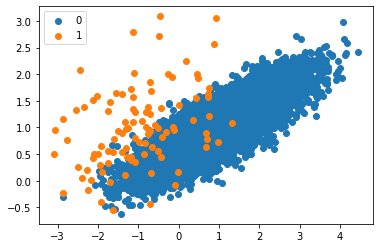

SMOTE-based oversampled data: Counter({0: 9900, 1: 990})


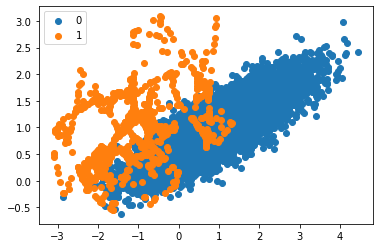

In [15]:
#SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

# 가상의 분류모형 데이터를 생성
X, y = make_classification(n_samples=10000 #표본 데이터의 수
                           , n_features=2 # 독립 변수의 수
                           , n_redundant=0 # 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수
                           ,n_clusters_per_class=1  # 클래스 당 클러스터의 수
                           , weights=[0.99]  # 각 클래스에 할당된 표본 수
                           , flip_y=0  # 클래스가 무작위로 할당 된 샘플의 비율.
                                       #값이 클수록 레이블에 노이즈가 발생하고 분류 작업이 더 어려워짐
                           , random_state=1 #난수 seed 설정
                          )
         
counter = Counter(y)
print('generated data: %s' % counter) # 기존 데이터 수
# SMOTE 전 
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

#SMOTE
# 다수 클래스를 샘플링하고 기존 소수 샘플을 보간하여 새로운 소수 인스턴스를 합성
over = SMOTE(sampling_strategy=0.1) # 10% sampling 
X, y = over.fit_resample(X, y)  # resampling 
counter = Counter(y)
print('SMOTE-based oversampled data: %s' % counter) # oversampling 후 데이터 수
# SMOTE 후
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

